In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.fft import fft
from scipy import fftpack
from mpl_toolkits.mplot3d import Axes3D



In [2]:
data_X = pd.read_csv('XA.csv')
data_Y = pd.read_csv('YA.csv')
data_Z = pd.read_csv('ZA.csv')

data_X = data_X.iloc[:, 1:4].abs()
data_X.columns = ['COMX_XA', 'COMX_YA', 'COMX_ZA']

data_Y = data_Y.iloc[:, 1:4].abs()
data_Y.columns = ['COMY_XA', 'COMY_YA', 'COMY_ZA']

data_Z = data_Z.iloc[:, 1:4].abs()
data_Z.columns = ['COMZ_XA', 'COMZ_YA', 'COMZ_ZA']

for i in [data_X,data_Y,data_Z]:
    print(i.head())


    COMX_XA   COMX_YA   COMX_ZA
0  0.580660  0.210117  1.043023
1  0.580660  0.210117  1.043023
2  0.587727  0.200344  1.073738
3  0.587727  0.200344  1.073738
4  0.587727  0.200344  1.073738
    COMY_XA   COMY_YA   COMY_ZA
0  0.260296  0.933312  1.109572
1  0.257940  0.930869  1.124930
2  0.257940  0.930869  1.124930
3  0.276785  0.928425  1.119811
4  0.276785  0.928425  1.119811
    COMZ_XA   COMZ_YA   COMZ_ZA
0  0.394566  0.149036  1.693154
1  0.394566  0.149036  1.693154
2  0.385143  0.146593  1.762262
3  0.385143  0.146593  1.762262
4  0.385143  0.129491  1.731547


In [3]:
data_X['COMX_XA']=data_X['COMX_XA']*1000
data_X['COMX_YA']=data_X['COMX_YA']*1000
data_X['COMX_ZA']=data_X['COMX_ZA']*1000

data_Y['COMY_XA']=data_Y['COMY_XA']*1000
data_Y['COMY_YA']=data_Y['COMY_YA']*1000
data_Y['COMY_ZA']=data_Y['COMY_ZA']*1000

data_Z['COMZ_XA']=data_Z['COMZ_XA']*1000
data_Z['COMZ_YA']=data_Z['COMZ_YA']*1000
data_Z['COMZ_ZA']=data_Z['COMZ_ZA']*1000

# Adjust the sensitivity and offset 
Gx1=220
bx1=50
Gy1=200
by1=50
Gz1=200
bz1=50

# Corrected magnetic field
data_X['COMX_XA']=(data_X['COMX_XA']-bx1)/Gx1
data_X['COMX_YA']=(data_X['COMX_YA']-by1)/Gy1
data_X['COMX_ZA']=(data_X['COMX_ZA']-bz1)/Gz1

data_Y['COMY_XA']=(data_Y['COMY_XA']-bx1)/Gx1
data_Y['COMY_YA']=(data_Y['COMY_YA']-by1)/Gy1
data_Y['COMY_ZA']=(data_Y['COMY_ZA']-bz1)/Gz1

data_Z['COMZ_XA']=(data_Z['COMZ_XA']-bx1)/Gx1
data_Z['COMZ_YA']=(data_Z['COMZ_YA']-by1)/Gy1
data_Z['COMZ_ZA']=(data_Z['COMZ_ZA']-bz1)/Gz1

data_X.head()

,COMX_XA,COMX_YA,COMX_ZA
0,2.412091,0.800585,4.965115
1,2.412091,0.800585,4.965115
2,2.444214,0.751720,5.118690
3,2.444214,0.751720,5.118690
4,2.444214,0.751720,5.118690


In [4]:
dfX = data_X.copy()
dfY = data_Y.copy()
dfZ = data_Z.copy()

for i in [dfX , dfY , dfZ]:
    print(i.shape)

df_merge = pd.merge(pd.merge(dfX,dfY , left_index=True, right_index=True, how='inner'),dfZ, left_index=True, right_index=True, how='inner' )
df_merge.head()




(2797, 3)
(3923, 3)
(3655, 3)


,COMX_XA,COMX_YA,COMX_ZA,COMY_XA,COMY_YA,COMY_ZA,COMZ_XA,COMZ_YA,COMZ_ZA
0,2.412091,0.800585,4.965115,0.955891,4.416560,5.297860,1.566209,0.495180,8.215770
1,2.412091,0.800585,4.965115,0.945182,4.404345,5.374650,1.566209,0.495180,8.215770
2,2.444214,0.751720,5.118690,0.945182,4.404345,5.374650,1.523377,0.482965,8.561310
3,2.444214,0.751720,5.118690,1.030841,4.392125,5.349055,1.523377,0.482965,8.561310
4,2.444214,0.751720,5.118690,1.030841,4.392125,5.349055,1.523377,0.397455,8.407735


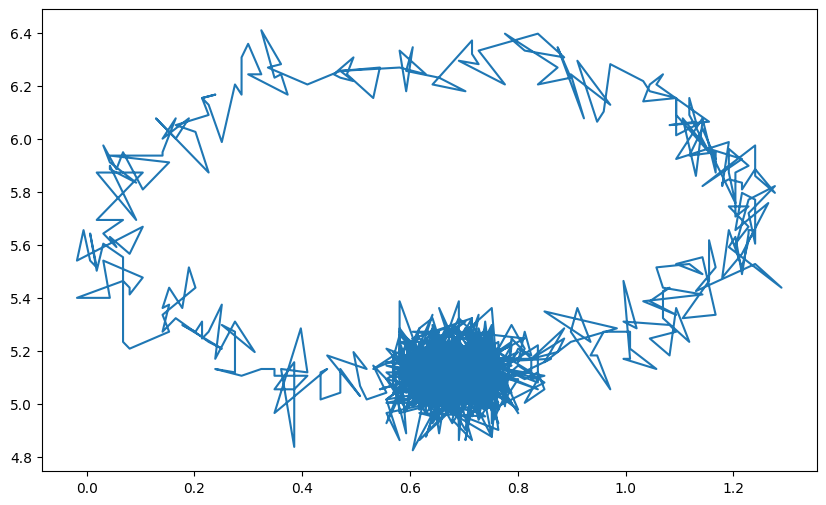

In [5]:
figure = plt.figure(figsize=(10,6))
plt.plot(df_merge['COMX_YA'],df_merge['COMX_ZA'])
plt.show()

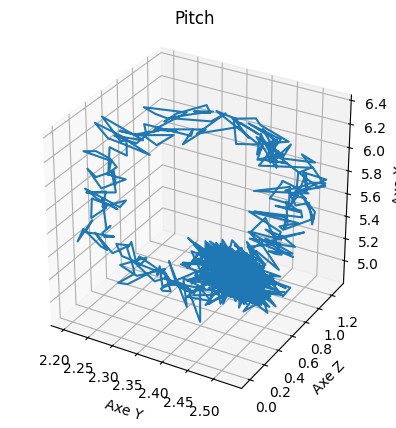

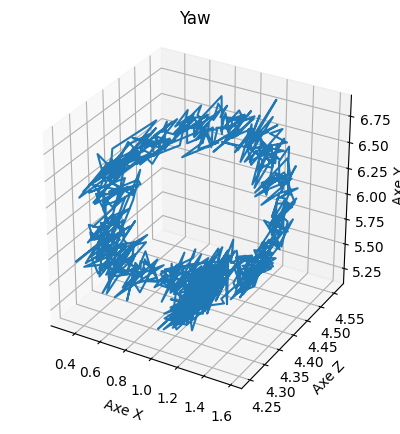

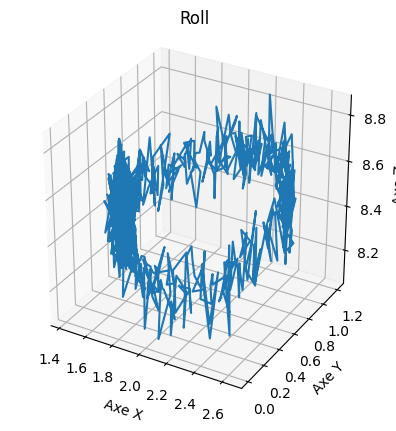

In [11]:

 from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Création des figures et des sous-graphiques 3D
fig1 = plt.figure()
fig2 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax2 = fig2.add_subplot(111, projection='3d')
ax3 = fig3.add_subplot(111, projection='3d')

# Tracé des données
ax1.plot(df_merge['COMX_XA'], df_merge['COMX_YA'], df_merge['COMX_ZA'])
ax2.plot(df_merge['COMY_XA'], df_merge['COMY_YA'], df_merge['COMY_ZA'])
ax3.plot(df_merge['COMZ_XA'], df_merge['COMZ_YA'], df_merge['COMZ_ZA'])

# Définition de l'échelle isométrique
ax1.set_box_aspect([1, 1, 1])
ax1.set_xlabel('Axe Y')
ax1.set_ylabel('Axe Z')
ax1.set_zlabel('Axe X')
ax1.set_title('Pitch')

ax2.set_box_aspect([1, 1, 1])
ax2.set_xlabel('Axe X')
ax2.set_ylabel('Axe Z')
ax2.set_zlabel('Axe Y')
ax2.set_title('Yaw')

ax3.set_box_aspect([1, 1, 1])
ax3.set_xlabel('Axe X')
ax3.set_ylabel('Axe Y')
ax3.set_zlabel('Axe Z')
ax3.set_title('Roll')

# Activation de la navigation et affichage du graphique
plt.show()


for i in 

In [7]:
plot3D

<function __main__.plot3D()>